In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf as maf
import healpy as hp


In [2]:
filename = 'franken_v2.99_10yrs.db'
run_name = filename.replace('.db', '')


In [3]:

sql ="note not like '%NEO%' and filter='r'"
metric = maf.PassMetric(cols=['night'])
slicer = maf.UserPointsSlicer(ra=0, dec=-20)

bundle_list = [maf.MetricBundle(metric, slicer, sql, run_name=run_name)]
bundle_dict = maf.make_bundles_dict_from_list(bundle_list)

In [4]:
bg = maf.MetricBundleGroup(bundle_dict, filename, out_dir='temp',results_db=None)
bg.run_all()


In [5]:
ack = np.sort(bundle_list[0].metric_values[0]['night'])

In [6]:
ack.size

167

Text(0, 0.5, 'N times')

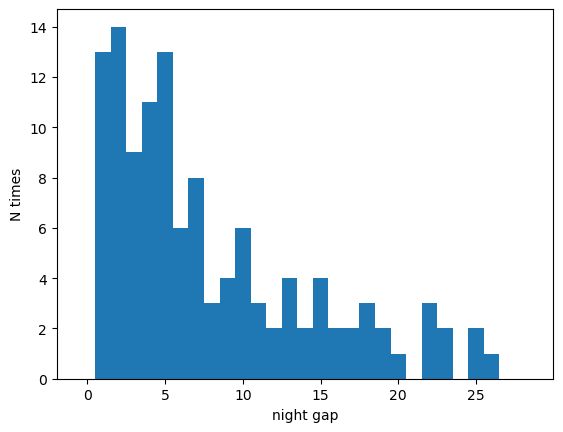

In [7]:
plt.hist(np.diff(np.unique(ack)), bins=np.arange(30)-0.5)
plt.xlabel('night gap')
plt.ylabel('N times')

In [8]:
np.diff(np.unique(ack))

array([  3,  11,  44, 181,  58,  25,  10,   7,  10,   7,   4,   7,  14,
         2,   4,  23,   5,   1,   5, 214,  13,   2,   5,  22,   5,   5,
        10,   1,   7,   3,   1,  10,   5,   8,   5,   1,   1,   3,  25,
         1,   2,   1, 301,   2,  19,  23,  13, 256,   6,   2,   7,   8,
         7,   6,   1,   6,  15,   5,   2,   1,   2,   9,  11,   3,  26,
         3,   2,   5,   3,  15,  14, 141,  32,  88,  30, 278,  10,   2,
         4,   1,   5,  18,   2,   4,   9,  18,   4,   4,  15,   3,   6,
         6,  17,   1,   5,   4,  10,  12, 123,  96,  18,  16,   7,   7,
        20, 290,  22,   2,  16,   2,   1,   1,   6,   4,  19,   8,   4,
        12,  11,  22,   9,   2,   5, 282,  13,  17, 278,   4,   9,   3,
         5,   2,   3,  13,   4,  15])